In [1]:
import os.path as path
from os import path
import pickle
import torch

import szx82.models.bert.pre.train as TRAIN
import szx82.models.bert.pre.model as MODEL


train data size: 5619
validation data size: 1874
test data size: 2497
vocab hash: RY9oRdHDGk7rFWlsW2RnCDqvJtg=

project dir: C:\Users\stefa\Documents\workspaces\szx81\EURUSD\data_store\tokenizer_piecewise_short;mean_len-15;seg_size-10;idx_step-1;level-4;\BERT_PRE_bert_dev
project name: BERT_PRE_bert_dev

 validation; loss trn,val:0.35,0.46; best:0.61; train:nsp,mlm:0.27,0.48; val.:nsp,mlm:0.18,0.41; ep:182; batch:0/1;       Model saved:
C:\Users\stefa\Documents\workspaces\szx81\EURUSD\data_store\tokenizer_piecewise_short;mean_len-15;seg_size-10;idx_step-1;level-4;\BERT_PRE_bert_dev\BERT_PRE_bert_dev.pt

Project saved:
C:\Users\stefa\Documents\workspaces\szx81\EURUSD\data_store\tokenizer_piecewise_short;mean_len-15;seg_size-10;idx_step-1;level-4;\BERT_PRE_bert_dev\BERT_PRE_bert_dev.pkl
Training Time: 1612.86 s


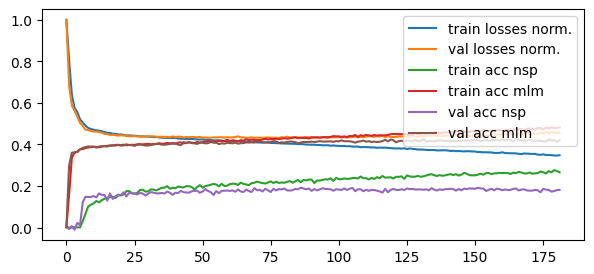

In [ ]:
DATA_STORE = r'C:\Users\stefa\Documents\workspaces\szx81\EURUSD\data_store'
DATA_FILE = path.join(
        DATA_STORE,
        r'dev_tokenizer_piecewise_short;mean_len-15;seg_size-10;idx_step-1;level-4;.pkl')

DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

torch.autograd.set_detect_anomaly(False) 

def trainer():
    training_shell = TRAIN.Train(
        file_name='bert',
        data_store=DATA_STORE,
        data=None,
        model=MODEL.MODEL,
    )

    def restore_project_training(project_file):
        project_shell = None
        try:
            path.exists(project_file)
            with open(project_file, 'rb') as f:
                project_shell = pickle.load(f)
        except Exception as ex:
            print(f'ERROR!\n{str(ex)}')
        if project_shell is not None:
            project_shell.train()

    # # RESTORE
    # restore_project_training(
    #      r'C:\Users\stefa\Documents\workspaces\szx81\EURUSD\data_store\tokenizer_piecewise_short;mean_len-15;seg_size-10;idx_step-1;level-4;\BERT_PRE_bert_rv_dev\BERT_PRE_bert_rv_dev.pkl')

    # # ##### PROJECT
    # training_shell.data = TRAIN.data(DATA_FILE, DEVICE)
    # # vocab:  RY9oRdHDGk7rFWlsW2RnCDqvJtg=
    # training_shell.batch_size = 256
    # training_shell.train(DEVICE, name_prep='bs256')
    # # loss trn,val:0.37,0.44 best: 0.62

    # ##### testing DEVELOPMENT
    training_shell.data = TRAIN.data(DATA_FILE, DEVICE)
    training_shell.batch_size = 64
    training_shell.init(DEVICE, name_prep='dev', force=True)
    training_shell.train()
    training_shell.stop_thd=0.2

    # ##### testing training CONTINUATION
    # training_shell.model_config_or_path = r'C:\Users\stefa\Documents\workspaces\szx81\EURUSD\data_store\tokenizer_piecewise_short;mean_len-15;seg_size-10;idx_step-1;level-4;\BERT_PRE_bert_rv\BERT_PRE_bert_rv_bst_.pt'
    # training_shell.train(DEVICE, name_prep='cont')

    '''DEFAULTS:
    '''
trainer()